In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Charger les données
data = pd.read_csv('/content/drive/My Drive/3ALINFO3_Machine_Learning/projet/credtscore(in).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-56-889a20493c4a>:14: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/3ALINFO3_Machine_Learning/projet/credtscore(in).csv')


# Étape 1 : Nettoyage et Préparation des Données

In [57]:
print("Dataset Info:")
data.info()
print("\nFirst five rows of the dataset:")
print(data.head())
print("\nMissing values per column:")
print(data.isnull().sum())
print("\nStatistical Summary:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               22365 non-null   object 
 2   Month                     22365 non-null   object 
 3   Name                      20143 non-null   object 
 4   Age                       22365 non-null   object 
 5   SSN                       22365 non-null   object 
 6   Occupation                22365 non-null   object 
 7   Annual_Income             22365 non-null   object 
 8   Monthly_Inhand_Salary     18975 non-null   float64
 9   Num_Bank_Accounts         22365 non-null   float64
 10  Num_Credit_Card           22365 non-null   float64
 11  Interest_Rate             22365 non-null   float64
 12  Num_of_Loan               22365 non-null   object 
 13  Type_of_Loan              11030

In [58]:
from sklearn.impute import SimpleImputer

# Handle numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

# Handle categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

print("Missing values handled. Remaining missing values:")
print(data.isnull().sum())


Missing values handled. Remaining missing values:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


Data size before outlier removal:


<Axes: ylabel='Monthly_Inhand_Salary'>

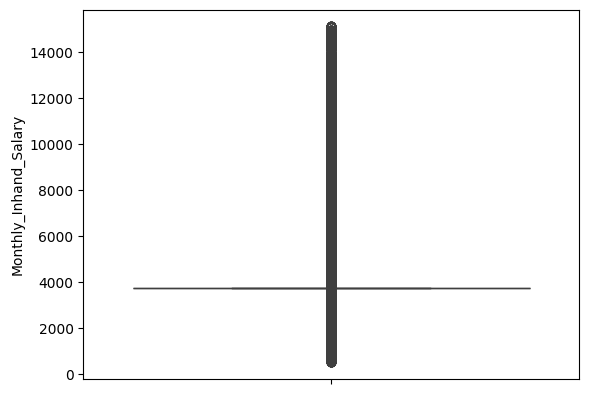

In [59]:
print("Data size before outlier removal:")
sns.boxplot(data['Monthly_Inhand_Salary'])

Number of duplicates before removal: 0
Number of duplicates after removal: 0
Number of outliers detected: 18967
Data size before outlier removal: (100000, 28)
Data size after outlier removal: (81033, 28)


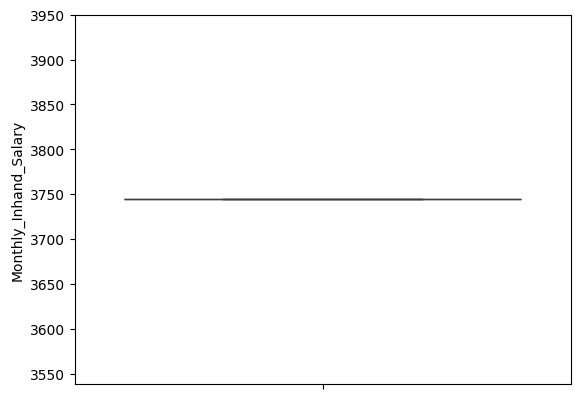

In [60]:
# Remove duplicate rows
print("Number of duplicates before removal:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicates after removal:", data.duplicated().sum())

# Detect and handle outliers (example with Monthly_Inhand_Salary)
q1 = data['Monthly_Inhand_Salary'].quantile(0.25)
q3 = data['Monthly_Inhand_Salary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers

outliers = data[(data['Monthly_Inhand_Salary'] < lower_bound) |
                (data['Monthly_Inhand_Salary'] > upper_bound)]
print("Number of outliers detected:", len(outliers))
print("Data size before outlier removal:", data.shape)


data = data[(data['Monthly_Inhand_Salary'] >= lower_bound) &
            (data['Monthly_Inhand_Salary'] <= upper_bound)]


sns.boxplot(data['Monthly_Inhand_Salary'])
print("Data size after outlier removal:", data.shape)


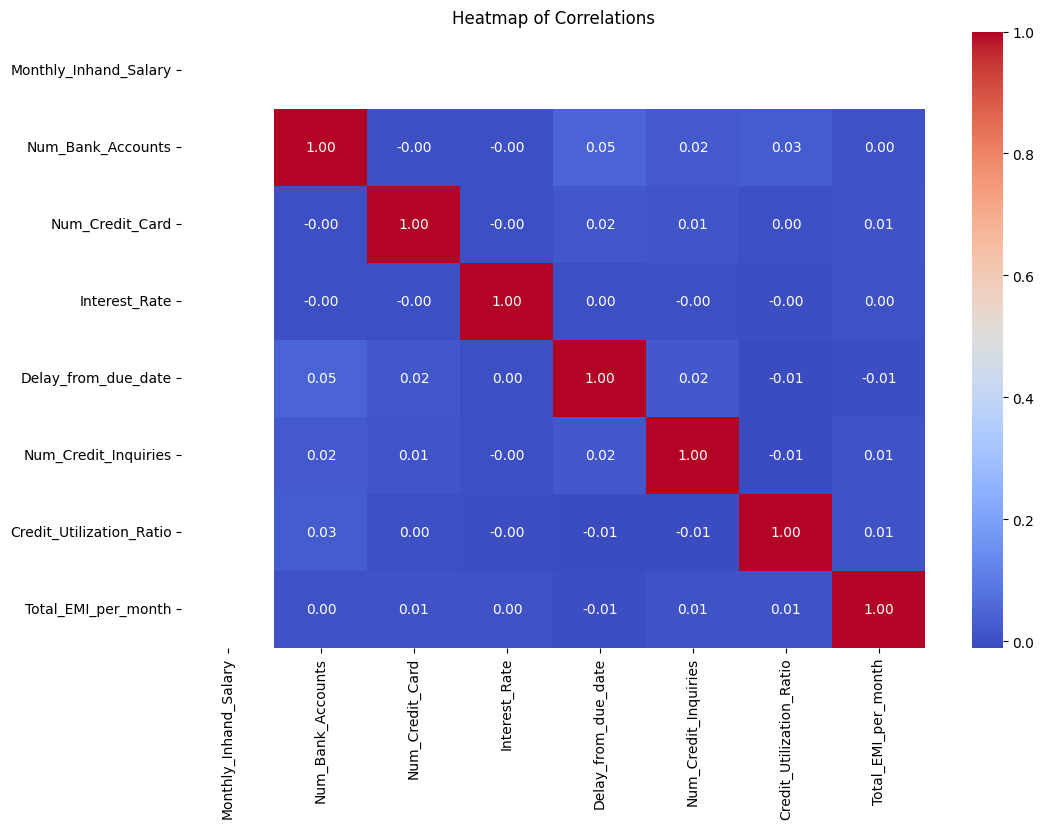

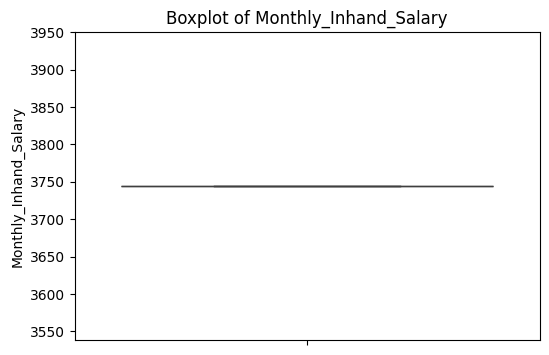

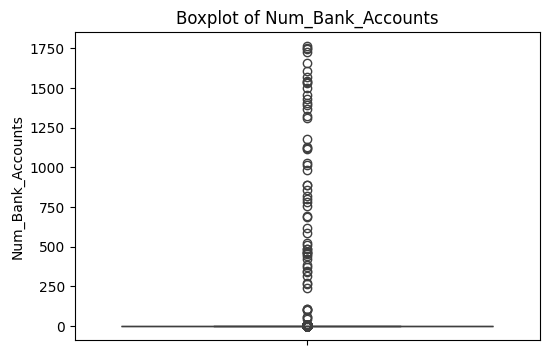

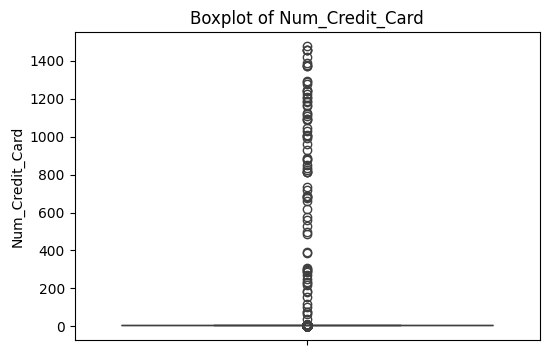

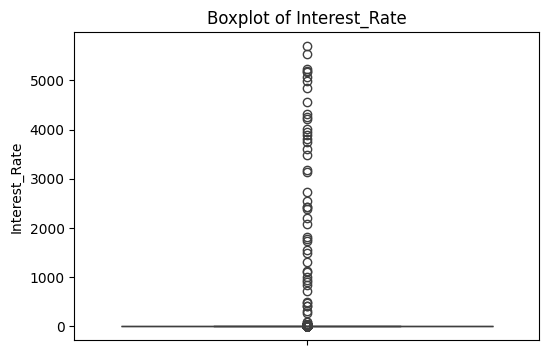

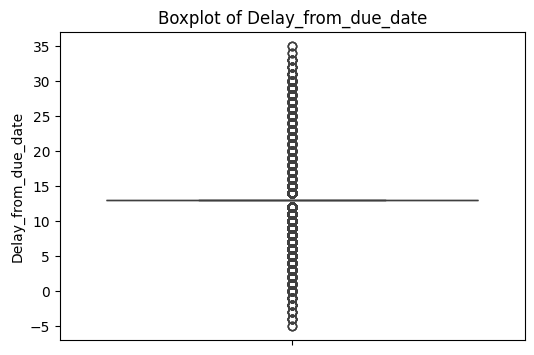

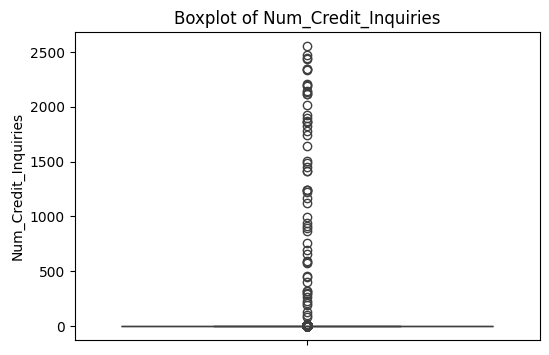

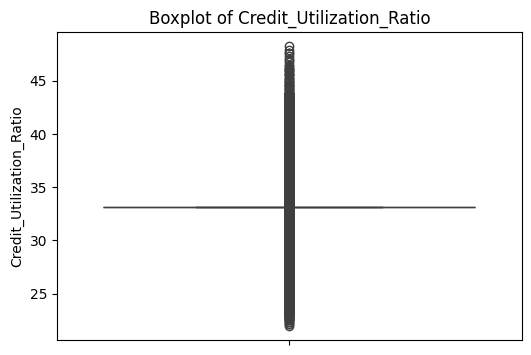

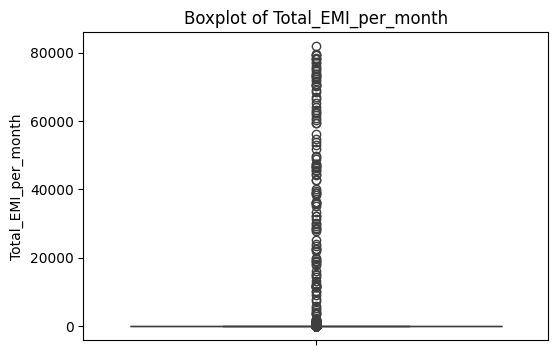

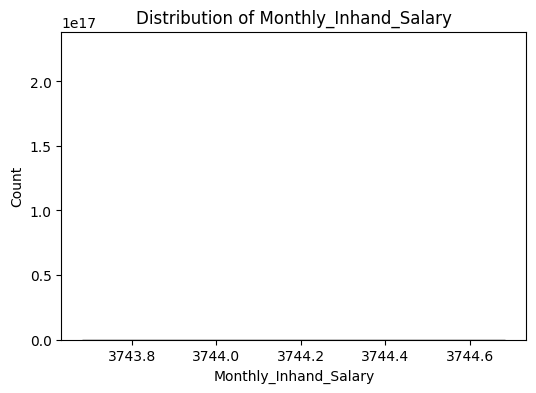

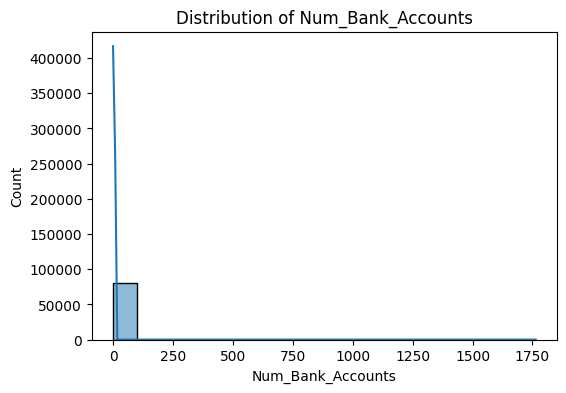

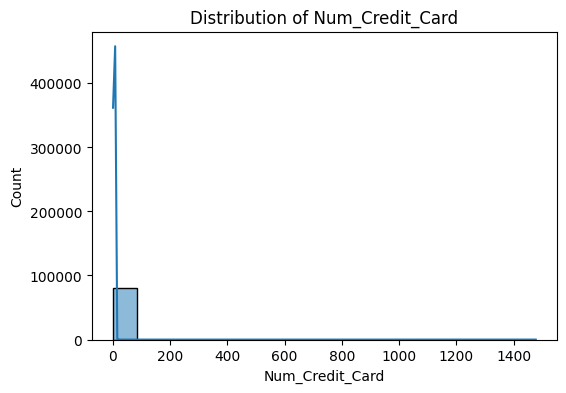

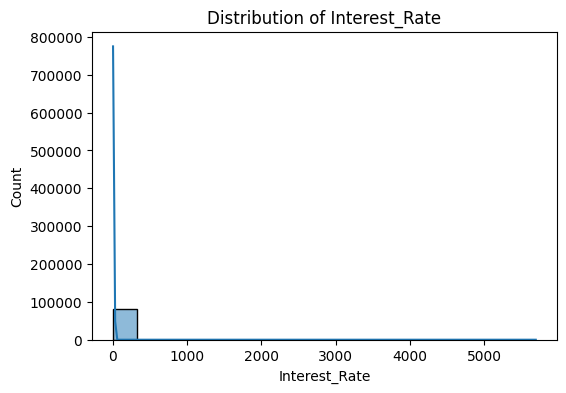

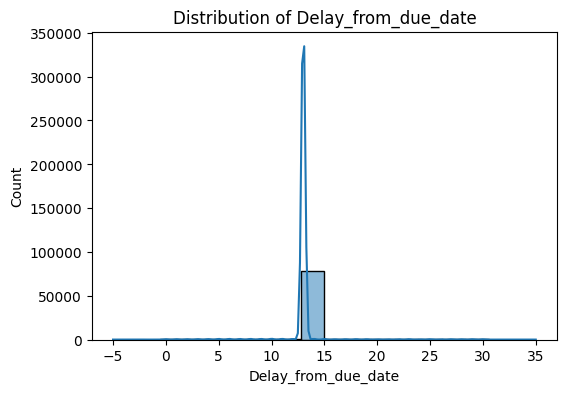

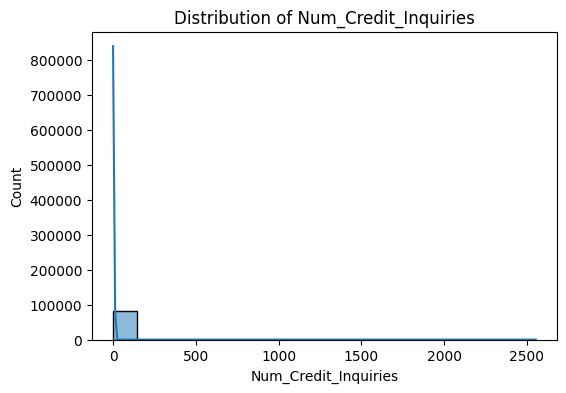

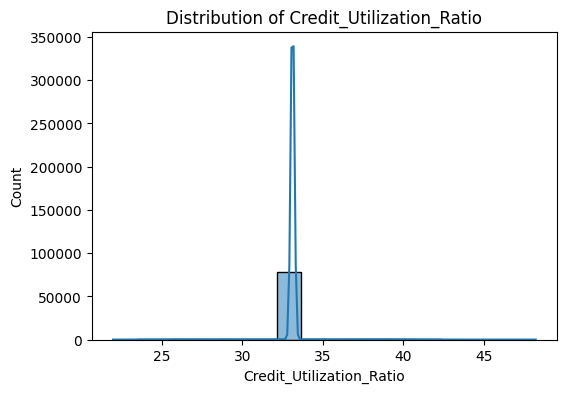

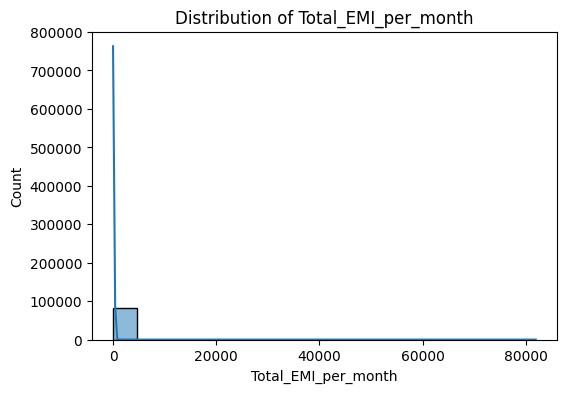

In [61]:
# Visualisation des corrélations
numerical_data = data.select_dtypes(include=[np.number])  # Select only numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()

# Identification des outliers via boxplots
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Vérification de la distribution des données
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [62]:
# Utilisation de KNN Imputer
# Techniques Avancées de Traitement des Valeurs Manquantes
# Utilisation de KNN Imputer

# Separate numerical and non-numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
non_numerical_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Display detected columns
print("Numerical columns:", numerical_columns)
print("Non-numerical columns:", non_numerical_columns)

# Display the first few rows before imputation
num_rows = 10  # Specify how many rows to display
print("\nData before imputation (first {} rows):".format(num_rows))
print(data.head(num_rows))

# Apply KNN Imputer only to numerical columns
imputer = KNNImputer(n_neighbors=5)
data_numerical = pd.DataFrame(imputer.fit_transform(data[numerical_columns]), columns=numerical_columns)


# Combine imputed numerical data with non-numerical columns
data_combined = pd.concat([data[non_numerical_columns].reset_index(drop=True), data_numerical], axis=1)


# Display the first few rows of the improved DataFrame
num_rows = 10  # Specify how many rows to display
print("\nResult after imputation (first {} rows):".format(num_rows))
print(data_combined.head(num_rows))

# Optional: Save the cleaned DataFrame
# data_combined.to_csv("cleaned_data.csv", index=False)

Numerical columns: Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Non-numerical columns: Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Data before imputation (first 10 rows):
                                                   ID Customer_ID  Month  \
0   0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-...  CUS_0x100b   July   
1   0x1603,CUS_0xd40,February,Aaron Maashoh,23,821...  CUS_0x100b   July   
2   0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-...  CUS_0x100b   July

In [63]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=[object]).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = data[col].astype(str)
    data[col] = encoder.fit_transform(data[col])

# Scale numerical features
numerical_cols = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [64]:
# Réduction de Dimensionalité
# Instead of using original data with NaN, use data_combined
# which contains the imputed values from KNNImputer
pca = PCA(n_components=0.95)  # Preserve 95% of variance
# Select only numerical columns from data_combined for PCA
numerical_cols_combined = data_combined.select_dtypes(include=[np.number]).columns
data_pca = pca.fit_transform(data_combined[numerical_cols_combined])

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("\nShape after PCA:", data_pca.shape)


Explained variance ratio: [0.99733221]

Shape after PCA: (81033, 1)


In [65]:
# Save the cleaned and reduced dataset
data_reduced = pd.DataFrame(data_pca)
data_reduced.to_csv("cleaned_reduced_credtscore.csv", index=False)
print("\nCleaned and reduced dataset saved as 'cleaned_reduced_credtscore.csv'.")


Cleaned and reduced dataset saved as 'cleaned_reduced_credtscore.csv'.


**Étape 2 : Transformation des Données**

In [66]:
# Étape 2 : Transformation des Données
# 1. Feature Engineering: Creating new variables
print("Starting feature engineering...")

# Example: Creating a debt-to-income ratio
data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / (data['Annual_Income'] + 1e-6)
print("Debt-to-Income Ratio added:")
print(data[['Outstanding_Debt', 'Annual_Income', 'Debt_to_Income_Ratio']].head())

# Example: Interaction between variables
data['Loans_and_Credit_Cards'] = data['Num_of_Loan'] + data['Num_Credit_Card']
print("\nLoans and Credit Cards feature added:")
print(data[['Num_of_Loan', 'Num_Credit_Card', 'Loans_and_Credit_Cards']].head())

Starting feature engineering...
Debt-to-Income Ratio added:
   Outstanding_Debt  Annual_Income  Debt_to_Income_Ratio
0         -0.175429      -0.180053              0.974324
1         -0.175429      -0.180053              0.974324
2         -0.175429      -0.180053              0.974324
3         -0.175429      -0.180053              0.974324
4         -0.175429      -0.180053              0.974324

Loans and Credit Cards feature added:
   Num_of_Loan  Num_Credit_Card  Loans_and_Credit_Cards
0    -0.106855        -0.026929               -0.133784
1    -0.106855        -0.026929               -0.133784
2    -0.106855        -0.026929               -0.133784
3    -0.106855        -0.026929               -0.133784
4    -0.106855        -0.026929               -0.133784


In [67]:
# 2. Binning: Transforming continuous variables into categories
from sklearn.preprocessing import KBinsDiscretizer
print("\nApplying binning to variables...")
binning = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
data['Age_Binned'] = binning.fit_transform(data[['Age']].fillna(0))  # Replace missing values before binning
print("Age binned into categories:")
print(data[['Age', 'Age_Binned']].head())


Applying binning to variables...
Age binned into categories:
        Age  Age_Binned
0  0.118386         2.0
1  0.118386         2.0
2  0.118386         2.0
3  0.118386         2.0
4  0.118386         2.0


In [68]:
# 3. Handling Outliers
print("\nHandling outliers...")
# Example: Capping age to remove extreme values
data['Age'] = data['Age'].clip(lower=18, upper=100)


Handling outliers...


In [69]:
# Replace extreme values in 'Credit_Utilization_Ratio'
data['Credit_Utilization_Ratio'] = data['Credit_Utilization_Ratio'].clip(upper=100)
print("Outliers handled in Age and Credit Utilization Ratio:")
print(data[['Age', 'Credit_Utilization_Ratio']].head())

Outliers handled in Age and Credit Utilization Ratio:
    Age  Credit_Utilization_Ratio
0  18.0                 -0.000847
1  18.0                 -0.000847
2  18.0                 -0.000847
3  18.0                 -0.000847
4  18.0                 -0.000847


In [70]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Vérification du déséquilibre des classes
print("\nVérification du déséquilibre des classes...")

# Étape 1 : Nettoyage de la colonne 'Credit_Score'
print("Nettoyage des données de la colonne 'Credit_Score'...")

# Convertir en numérique, remplacer les non numériques par NaN
data['Credit_Score'] = pd.to_numeric(data['Credit_Score'], errors='coerce')

# Vérifier les valeurs manquantes ou non valides
print("Valeurs non valides détectées :")
print(data['Credit_Score'].isna().sum())

# Remplacer les valeurs manquantes par une valeur par défaut (par exemple, la moyenne)
imputer = SimpleImputer(strategy='mean')
data['Credit_Score'] = imputer.fit_transform(data[['Credit_Score']])

# Étape 2 : Conversion en classes discrètes
print("Conversion de 'Credit_Score' en classes discrètes...")
bins = [0, 650, 750, 850]  # Définir les intervalles des scores
labels = ['Poor', 'Fair', 'Good']  # Définir les étiquettes des classes
data['Credit_Score_Class'] = pd.cut(data['Credit_Score'], bins=bins, labels=labels, right=False)

# Vérification après binning
print("Colonne 'Credit_Score_Class' après conversion :")
print(data['Credit_Score_Class'].value_counts())

# Étape 3 : Préparation des données pour SMOTE
target_column = 'Credit_Score_Class'

# Vérifier si les classes sont déséquilibrées
if data[target_column].value_counts(normalize=True).min() < 0.4:
    print("Déséquilibre des classes détecté, application de SMOTE...")

    # Préparer les caractéristiques et la cible
    features = data.drop(columns=[target_column])
    target = data[target_column]

    # Convertir toutes les colonnes en numériques
    features = features.apply(pd.to_numeric, errors='coerce')

    # Remplir les valeurs manquantes
    features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

    # Encoder la cible pour SMOTE
    label_encoder = LabelEncoder()
    target_encoded = label_encoder.fit_transform(target)

    # Application de SMOTE
    smote = SMOTE(random_state=42)
    features_balanced, target_balanced = smote.fit_resample(features, target_encoded)

    # Convertir la cible équilibrée en catégories
    target_balanced = pd.Series(label_encoder.inverse_transform(target_balanced), name=target_column)

    # Fusionner les données équilibrées
    data_balanced = pd.concat([features_balanced, target_balanced], axis=1)

    print("SMOTE appliqué avec succès. Répartition des classes équilibrée :")
    print(data_balanced[target_column].value_counts(normalize=True))
else:
    print("Aucun déséquilibre significatif des classes détecté.")



Vérification du déséquilibre des classes...
Nettoyage des données de la colonne 'Credit_Score'...
Valeurs non valides détectées :
0
Conversion de 'Credit_Score' en classes discrètes...
Colonne 'Credit_Score_Class' après conversion :
Credit_Score_Class
Poor    79619
Fair        0
Good        0
Name: count, dtype: int64
Déséquilibre des classes détecté, application de SMOTE...
SMOTE appliqué avec succès. Répartition des classes équilibrée :
Credit_Score_Class
Poor    1.0
Name: proportion, dtype: float64


**Etape 3:**

**3.1 Ensemble Learning (Bagging et Boosting) :**

**3.1.1 Random Forest Classifier (Classification)**


Accuracy: 0.996914913309064
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       200
           1       0.91      0.48      0.63        88
           2       1.00      1.00      1.00     15919

    accuracy                           1.00     16207
   macro avg       0.91      0.82      0.84     16207
weighted avg       1.00      1.00      1.00     16207



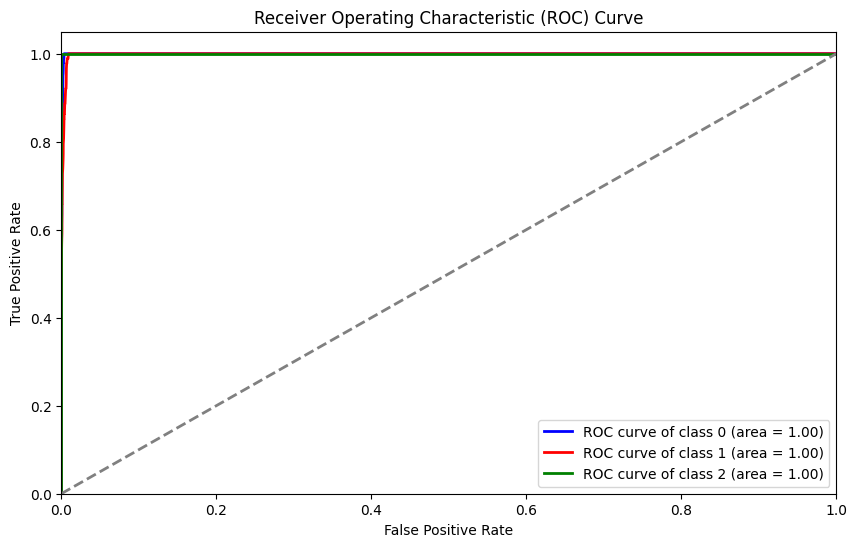

In [71]:
#3.1 Random Forest Classifier (Classification)
# Importation des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


# Préparation des données
X = data.drop("Credit_Score", axis=1)  # Caractéristiques
y = data["Credit_Score"]  # Colonne cible

# Encodage des variables catégoriques
X = pd.get_dummies(X)
y = y.astype('category').cat.codes  # Transformation des classes en codes numériques

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_clf.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Binarize the output for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Génération de la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = rf_clf.predict_proba(X_test)  # Get probabilities for all classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**3.1.2 Gradient Boosting Regressor (Régression)**

In [72]:
#Gradient Boosting Regressor (Régression)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Préparation des données (remplacez "Target" par votre colonne cible)
X = data.drop("Annual_Income", axis=1)  # Caractéristiques
y = data["Annual_Income"]              # Cible

# Encodage des variables catégoriques et normalisation (si nécessaire)
X = pd.get_dummies(X)

# Impute missing values using SimpleImputer before training
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Impute missing values in X

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraînement du modèle
gb_reg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = gb_reg.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.021680089015992967
R² Score: 0.978543091404702


**3.2.1 MLP (Multilayer Perceptron)**

In [73]:
#3.2 MLP (Multilayer Perceptron)
# MLP (Multilayer Perceptron)
# Import des librairies nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Vérifier les types de données
print("Types de données :\n", data.dtypes)

# Prétraitement des données
# Étape 1 : Identifier et encoder les colonnes catégoriques
categorical_columns = data.select_dtypes(include=['object']).columns

# Label Encoding pour les colonnes catégoriques
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Encodage des catégories
    label_encoders[col] = le

# Étape 2 : Gérer les valeurs manquantes
# Exclude 'Credit_Score_Class' from imputation as it is categorical
numerical_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Charger et préparer les données
# Drop 'Credit_Score_Class' from the features
X = data.drop(['Annual_Income', 'Credit_Score_Class'], axis=1)  # Données d'entrée
y = data['Annual_Income']  # Données cibles

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle Perceptron Multicouche (MLP)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Entraîner le modèle
mlp.fit(X_train, y_train)

# Faire des prédictions
y_pred = mlp.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Types de données :
 ID                           float64
Customer_ID                  float64
Month                        float64
Name                         float64
Age                          float64
SSN                          float64
Occupation                   float64
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card              float64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                 float64
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                   float64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour            float64
Monthly_Balance   

**3.3 KMeans**

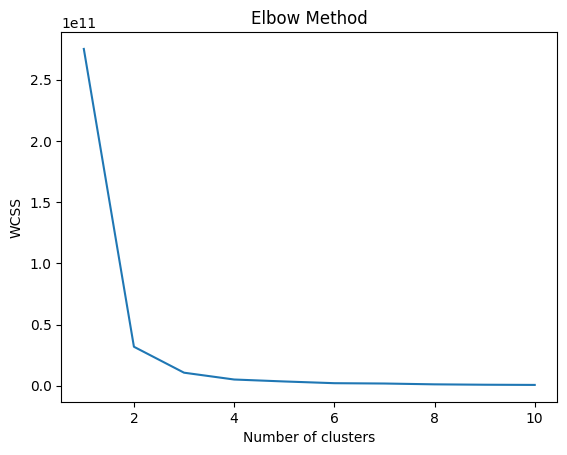

<ipython-input-74-3e70e81b924f>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


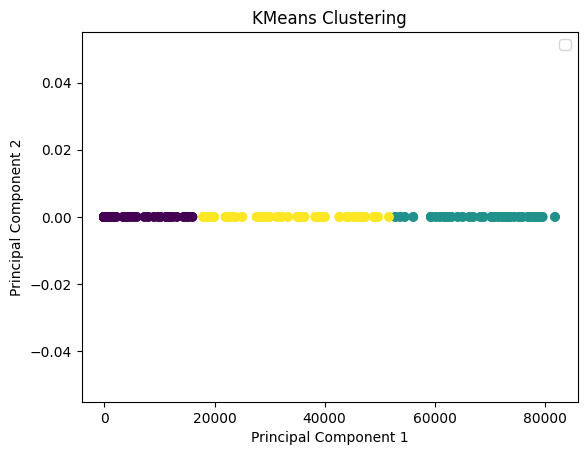

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data_pca' is your PCA-transformed data (from previous code)
# If not, replace with your actual preprocessed data

# Determine optimal number of clusters (optional but recommended)
# Use the elbow method or silhouette analysis
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the chosen number of clusters (e.g., 3 based on the elbow method)
n_clusters = 3  # Replace with your optimal number
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data_combined['cluster'] = kmeans.fit_predict(data_pca)

# Visualize the clusters (for 2D PCA data)
plt.scatter(data_pca[:, 0], [0] * len(data_pca), c=data_combined['cluster'], cmap='viridis')

plt.scatter(data_pca[:, 0], [0] * len(data_pca), c=data_combined['cluster'], cmap='viridis')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**3.4 Méthodes de Régression et Classifications Avancées :**

**3.4.1 Régression Logistique avec régularisation L1/L2 (Elastic Net)**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       104
           1       0.78      0.86      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Confusion Matrix:
[[81 23]
 [13 83]]


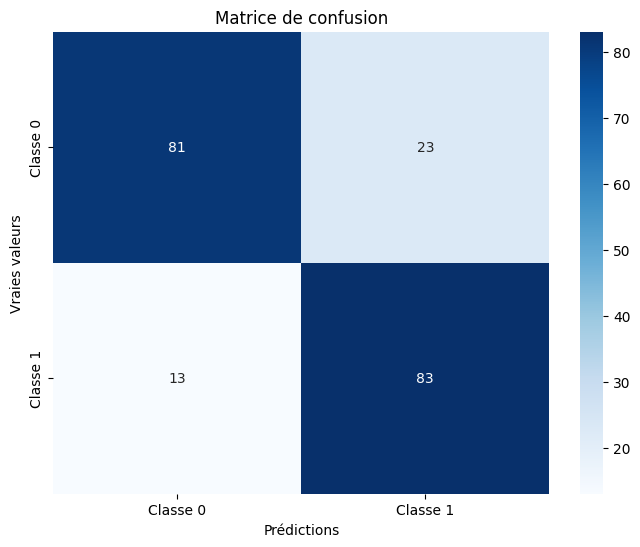

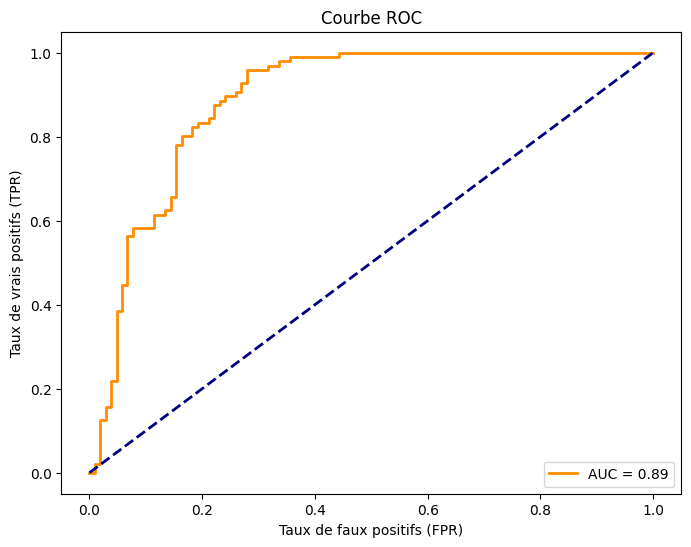

In [75]:
# Importer les librairies nécessaires pour les graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Importer les librairies nécessaires pour la régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Générer un jeu de données fictif pour la classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer le modèle de Régression Logistique avec Elastic Net (L1/L2)
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)

# Entraîner le modèle
log_reg.fit(X_train, y_train)

# Prédire les résultats
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# Évaluer les performances
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Matrice de confusion visualisée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

**3.4.2 Support Vector Machines (SVM) avec noyaux non linéaires**

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       104
           1       0.91      0.97      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Confusion Matrix:
[[95  9]
 [ 3 93]]


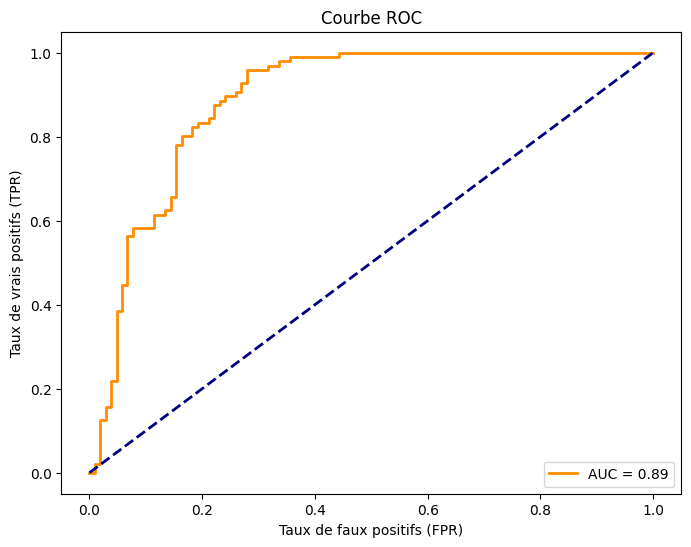

In [76]:
#3.4 Support Vector Machines (SVM) avec noyaux non linéaires
# Importer les librairies nécessaires
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Générer un jeu de données fictif pour la classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer le modèle SVM avec noyau RBF
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Entraîner le modèle
svm.fit(X_train, y_train)

# Prédire les résultats
y_pred = svm.predict(X_test)

# Évaluer les performances
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

# **Étape 4 :**

**4.1 Validation Croisée :**


**Implémenter une validation croisée k-fold pour garantir que les résultats généralisent bien sur des données non vues.**


Précision moyenne sur 5 folds : 0.932


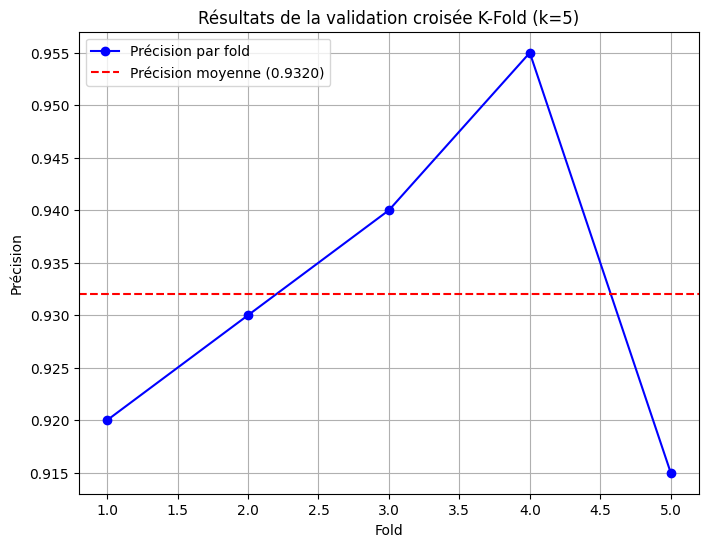

0.932

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score  # Exemple de métrique, à remplacer si nécessaire
from sklearn.impute import SimpleImputer  # Importation de SimpleImputer
from sklearn.preprocessing import LabelEncoder  # Importation de LabelEncoder

def kfold_cross_validation(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Création de l'objet KFold pour la validation croisée
    scores = []  # Liste pour stocker les scores de chaque itération

    # Créer une instance de LabelEncoder à l'extérieur de la boucle
    encoder = LabelEncoder()

    # Boucle sur chaque "fold"
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]  # Séparation des données en jeu d'entraînement et de test
        y_train, y_test = y[train_index], y[test_index]  # Séparation des labels en jeu d'entraînement et de test

        # Imputation des valeurs manquantes dans X_train
        imputer_X = SimpleImputer(strategy='most_frequent')  # Imputation avec la valeur la plus fréquente
        X_train = imputer_X.fit_transform(X_train)  # Appliquer l'imputation à X_train
        X_test = imputer_X.transform(X_test)  # Appliquer la même imputation à X_test

        # Encodage de y_train et y_test
        y_train = encoder.fit_transform(y_train)  # Encoder les labels d'entraînement
        y_test = encoder.transform(y_test)  # Utiliser le même encodeur pour y_test

        model.fit(X_train, y_train)  # Entraînement du modèle
        y_pred = model.predict(X_test)  # Prédiction sur le jeu de test
        scores.append(accuracy_score(y_test, y_pred))  # Ajouter le score de précision à la liste des scores

    # Calcul du score moyen
    average_score = np.mean(scores)
    print(f"Précision moyenne sur {k} folds : {average_score}")  # Affichage du score moyen

    # Tracer les scores pour chaque fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, k+1), scores, marker='o', linestyle='-', color='b', label='Précision par fold')
    plt.axhline(y=average_score, color='r', linestyle='--', label=f'Précision moyenne ({average_score:.4f})')
    plt.title(f'Résultats de la validation croisée K-Fold (k={k})')
    plt.xlabel('Fold')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid(True)
    plt.show()

    return average_score

kfold_cross_validation(rf_clf, X, y, k=5)  # Exécution de la validation croisée avec k=5 folds

**4.2 Optimisation des Hyperparamètres :**


**Utilisation de GridSearchCV ou RandomizedSearchCV pour optimiser les paramètres de vos modèles.**


Meilleurs hyperparamètres (GridSearchCV) : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score (GridSearchCV) : 0.9262482047816171
              precision    recall  f1-score   support

           0       0.95      0.87      0.90       104
           1       0.87      0.95      0.91        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



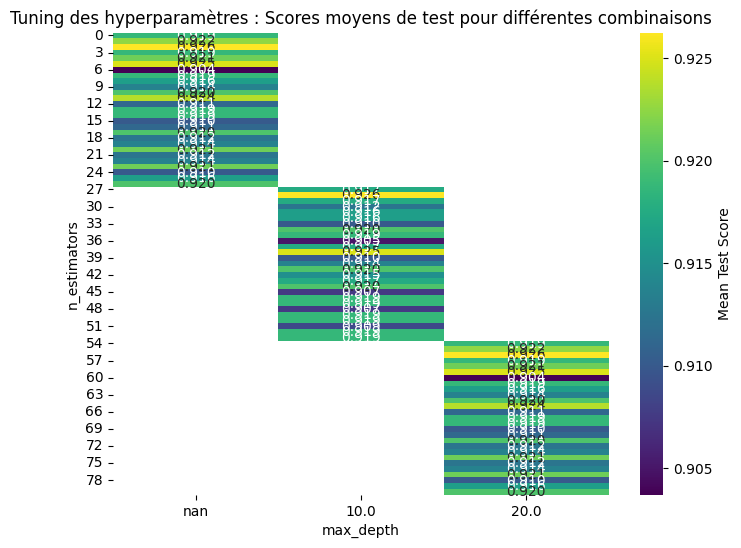

In [104]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encodage de la variable cible (y)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y.astype(str))  # Forcer en chaîne pour gérer les NaNs potentiels

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Définir la grille de paramètres pour RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20],     # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10], # Nombre minimal d'échantillons nécessaires pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4]    # Nombre minimal d'échantillons pour être à un nœud feuille
}

# Initialisation de RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# GridSearchCV (recherche exhaustive)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score de GridSearchCV
print("Meilleurs hyperparamètres (GridSearchCV) :", grid_search.best_params_)
print("Meilleur score (GridSearchCV) :", grid_search.best_score_)

# Extraire le meilleur modèle de GridSearchCV
best_rf_grid = grid_search.best_estimator_

# Évaluer le meilleur modèle
y_pred = best_rf_grid.predict(X_test)
print(classification_report(y_test, y_pred))

# Convertir les résultats de la recherche dans un DataFrame pandas
results_df = pd.DataFrame(grid_search.cv_results_)

# Réinitialiser l'index pour éviter les doublons
results_df = results_df.reset_index()

# Extraire les scores moyens de test et les remodeler en fonction des hyperparamètres
mean_test_scores = results_df.pivot(index='index', columns='param_max_depth', values='mean_test_score')  # L'index a été changé en 'index'

# Créer une carte thermique des scores moyens de test pour différentes combinaisons d'hyperparamètres
plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Mean Test Score'})
plt.title('Tuning des hyperparamètres : Scores moyens de test pour différentes combinaisons')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')  # Envisager de changer le ylabel pour plus de clarté
plt.show()

Meilleurs hyperparamètres (RandomizedSearchCV) : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Meilleur score (RandomizedSearchCV) : 0.9262482047816171
              precision    recall  f1-score   support

           0       0.95      0.87      0.90       104
           1       0.87      0.95      0.91        96

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



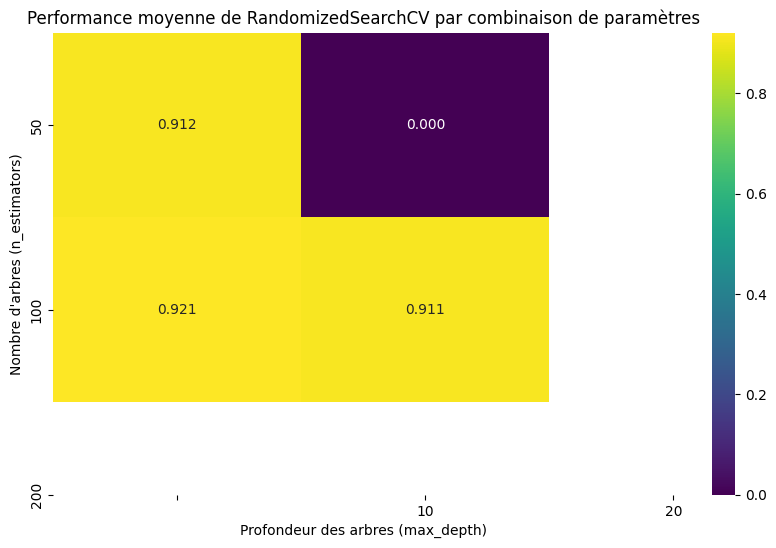

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Encodage de la variable cible (y)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y.astype(str))  # On force la conversion en chaîne pour gérer les éventuels NaNs dans la variable cible

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Définition de l'espace des paramètres pour RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt (plus il y en a, plus le modèle est robuste)
    'max_depth': [None, 10, 20],     # Profondeur maximale des arbres (contrôle la complexité du modèle)
    'min_samples_split': [2, 5, 10], # Nombre minimal d'échantillons nécessaires pour diviser un nœud interne (évite le sur-apprentissage)
    'min_samples_leaf': [1, 2, 4]    # Nombre minimal d'échantillons nécessaires dans un nœud feuille (évite un modèle trop spécifique)
}

# Initialisation du classificateur RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# RandomizedSearchCV (recherche aléatoire des meilleurs paramètres)
# Cette technique permet d'explorer un sous-ensemble de l'espace des paramètres en un nombre d'itérations spécifié
random_search = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,  # Espace des paramètres à explorer
                                   n_iter=10,  # Nombre d'itérations (combinations de paramètres à tester)
                                   cv=3,  # Nombre de plis pour la validation croisée
                                   scoring='accuracy',  # Critère d'évaluation basé sur l'accuracy
                                   random_state=42,  # Permet de rendre les résultats reproductibles
                                   n_jobs=-1)  # Utilisation de tous les cœurs de processeur disponibles pour accélérer les calculs

# Entraînement du modèle avec la recherche aléatoire
random_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres et du meilleur score obtenu via RandomizedSearchCV
print("Meilleurs hyperparamètres (RandomizedSearchCV) :", random_search.best_params_)
print("Meilleur score (RandomizedSearchCV) :", random_search.best_score_)

# Récupération du meilleur modèle trouvé par RandomizedSearchCV
best_rf_random = random_search.best_estimator_

# Évaluation du meilleur modèle sur l'ensemble de test
y_pred_random = best_rf_random.predict(X_test)

# Affichage du rapport de classification pour évaluer la performance sur l'ensemble de test
print(classification_report(y_test, y_pred_random))

# Visualisation des performances de RandomizedSearchCV
# Extraire les résultats de la recherche aléatoire pour les visualiser
results = random_search.cv_results_

# Extraire les valeurs des scores moyens pour chaque combinaison de paramètres
mean_test_scores = results['mean_test_score']
params = results['params']

# Create a DataFrame to store the results
scores_df = pd.DataFrame(params)
scores_df['mean_test_score'] = mean_test_scores

# Pivot the DataFrame to create a matrix for the heatmap
# Use pivot_table instead of pivot to aggregate duplicate entries
scores_matrix = scores_df.pivot_table(
    index='n_estimators',
    columns='max_depth',
    values='mean_test_score',
    aggfunc='mean'  # or any other appropriate aggregation function
)

# Fill NaN values with 0 (if any)
scores_matrix = scores_matrix.fillna(0)

# Visualisation des résultats avec seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="viridis", xticklabels=param_grid['max_depth'], yticklabels=param_grid['n_estimators'])
plt.title("Performance moyenne de RandomizedSearchCV par combinaison de paramètres")
plt.xlabel('Profondeur des arbres (max_depth)')
plt.ylabel('Nombre d\'arbres (n_estimators)')
plt.show()

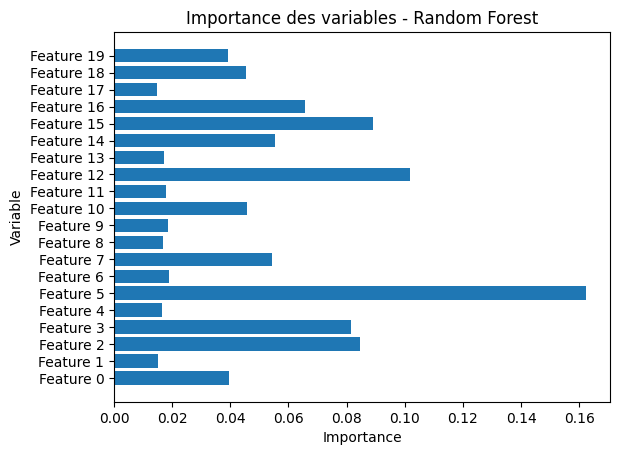

In [112]:
#Importance des variables
importances = rf_clf.feature_importances_
# Assuming 'X' was originally a pandas DataFrame before transformations:
# feature_names = X.columns # Use the original DataFrame's columns
# Since X is a numpy array, you need to create feature names or access them from
# a previous DataFrame if available. If the features are not named, you can create
# a range of indices as feature names:
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables - Random Forest')
plt.show()

**4.3 Feature Importance et Interprétabilité :**


Utiliser des outils comme SHAP ou LIME pour interpréter les prédictions des modèles complexes.


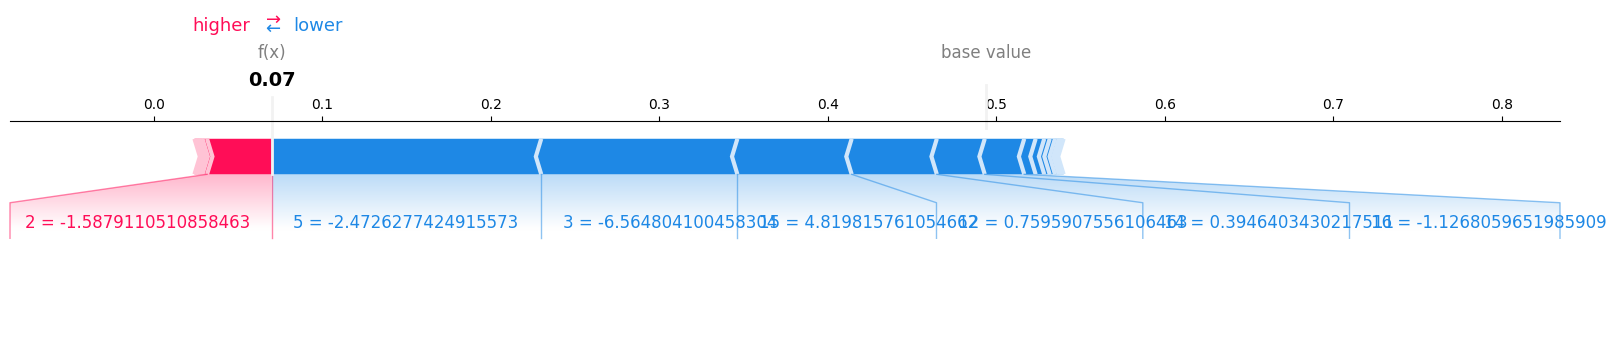

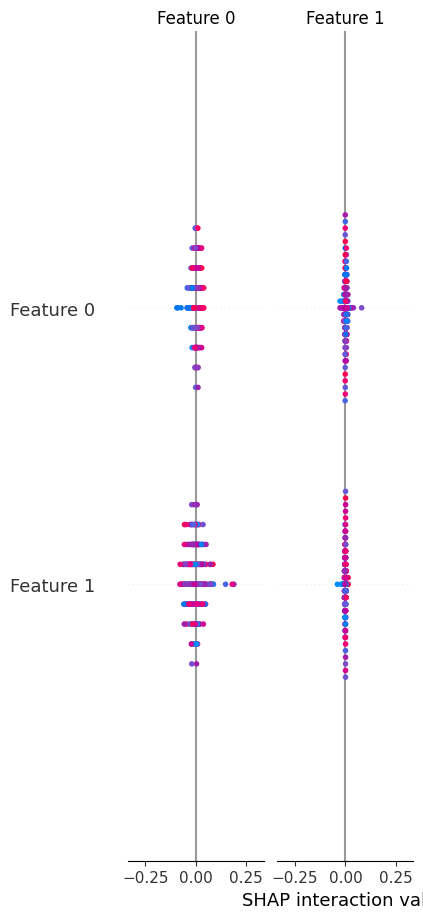

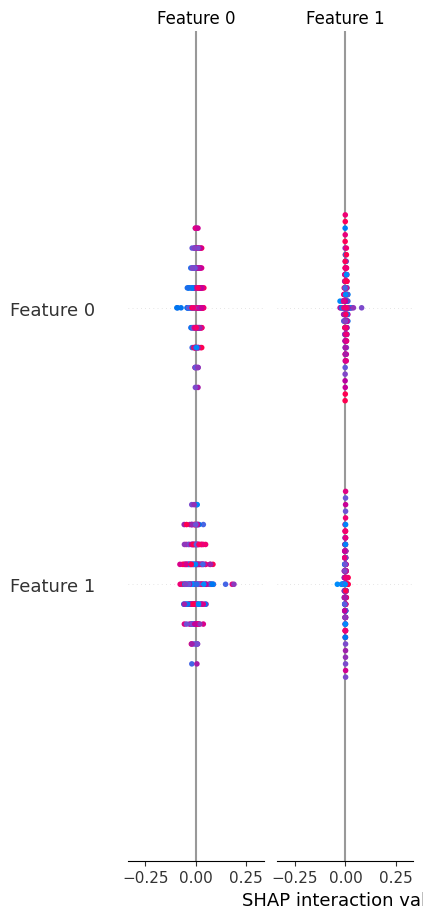

In [117]:
import shap
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np

# Entraînement du modèle avant de l'utiliser pour SHAP
rf_clf.fit(X_train, y_train)  # Entraînement du modèle avec les données d'entraînement

# Explication des prédictions du modèle à l'aide des valeurs SHAP
explainer = shap.TreeExplainer(rf_clf)  # Utilisation de TreeExplainer pour les modèles basés sur des arbres (comme Random Forest)
shap_values = explainer.shap_values(X_test)  # Calcul des valeurs SHAP pour les données de test

# Initialisation de Javascript pour les visualisations interactives
shap.initjs()

# Conversion de X_train en DataFrame pour récupérer les noms des colonnes
X_train_df = pd.DataFrame(X_train)

# Utilisation des noms de colonnes pour X_test_df
X_test_df = pd.DataFrame(X_test, columns=X_train_df.columns)

# Sélection des valeurs SHAP pour la première instance et la première classe
instance_shap_values = shap_values[0][:, 0]

# Convert all columns in X_test_df to numeric, replacing errors with NaN
X_test_df = X_test_df.apply(pd.to_numeric, errors='coerce')

# Ensure all columns in X_test_df are numeric and convert them if necessary
for col in X_test_df.columns:
    X_test_df[col] = pd.to_numeric(X_test_df[col], errors='coerce')

# Impute missing values (NaN) with the mean
imputer = SimpleImputer(strategy='mean')
X_test_df = pd.DataFrame(imputer.fit_transform(X_test_df), columns=X_test_df.columns)

# Convert feature values to strings before concatenation in force_plot
X_test_df = X_test_df.astype(str)  # Convert all columns to string type

# Visualisation des valeurs SHAP pour la première instance
# Utilisation de shap.force_plot pour générer un graphique interactif montrant l'impact des caractéristiques sur la prédiction
shap.force_plot(explainer.expected_value[0], instance_shap_values, X_test_df.iloc[0, :].astype(str),
                matplotlib=True)

# Résumer les effets de toutes les caractéristiques
# Le plot sera plus lisible avec un meilleur agencement des couleurs et des axes
shap.summary_plot(shap_values, X_test, plot_type="dot", max_display=10, color_bar=True)  # dot plot pour un affichage plus clair des effets

# Visualiser l'importance de chaque caractéristique sous forme de barres
# Affichage plus esthétique avec l'ajustement des couleurs et du style
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10, color="Blues")  # Utilisation d'une palette plus douce

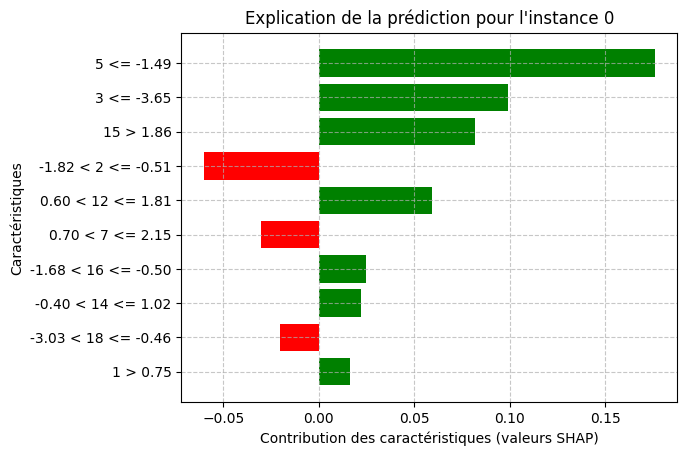

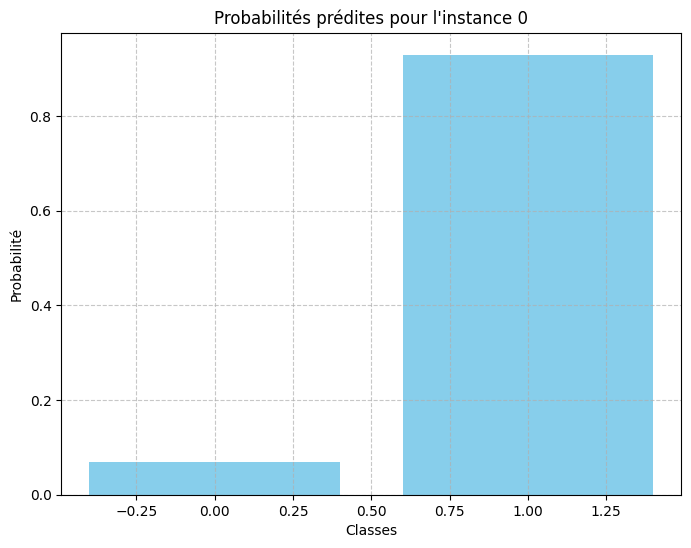

In [119]:
# Installer la bibliothèque LIME si elle n'est pas déjà installée
#!pip install lime  # Décommentez cette ligne si nécessaire

import lime
import lime.lime_tabular
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Création d'un objet LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,  # Les données d'entraînement utilisées pour expliquer les prédictions
    feature_names=X_train_df.columns.tolist(),  # Noms des caractéristiques
    class_names=list(np.unique(y_train)),  # Noms des classes de la cible
    mode='classification',  # Mode d'explication pour la classification
    discretize_continuous=True  # Discrétisation des variables continues
)

# Explication d'une seule prédiction
i = 0  # Index de l'observation à expliquer (ici, la première observation de X_test)
exp = explainer.explain_instance(
    X_test[i],  # Sélection de l'instance de test à expliquer
    rf_clf.predict_proba,  # Utilisation de la probabilité prédite par le modèle
    num_features=10  # Nombre de caractéristiques à afficher dans l'explication
)

# Affichage de l'explication dans le notebook
exp.show_in_notebook(show_table=True)  # Affiche un tableau interactif avec les contributions des caractéristiques

# Visualisation graphique de l'explication (bar plot)
fig = exp.as_pyplot_figure()
plt.title(f'Explication de la prédiction pour l\'instance {i}')
plt.xlabel('Contribution des caractéristiques (valeurs SHAP)')
plt.ylabel('Caractéristiques')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optionnel : Visualisation des probabilités prédites pour chaque classe
probabilities = rf_clf.predict_proba(X_test[i].reshape(1, -1))[0]
plt.figure(figsize=(8, 6))
plt.bar(np.unique(y_train), probabilities, color='skyblue')
plt.title(f'Probabilités prédites pour l\'instance {i}')
plt.xlabel('Classes')
plt.ylabel('Probabilité')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()